In [1]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# 한글이 안되므로 한글 세팅해야 됨 
plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)

In [3]:
df1 = pd.read_excel("./dataset/stock price.xlsx")
df2 = pd.read_excel("./dataset/stock price.xlsx")

print("df1 = \n", df1.head())
print("df2 = \n", df2.head())

df1 = 
        id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200
df2 = 
        id stock_name          value   price
0  128940       한미약품   59385.666667  421000
1  130960     CJ E&M   58540.666667   98900
2  138250      엔에스쇼핑   14558.666667   13200
3  139480        이마트  239230.833333  254500
4  142280     녹십자엠에스     468.833333   10200


In [6]:
## concat 
pd.concat([df1, df2], join = "outer", ignore_index= True )
pd.concat([df1, df2], axis = 1, join = "outer", ignore_index= True )

,0,1,2,3,4,5,6,7
0,128940,한미약품,59385.666667,421000,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475,204210,모두투어리츠,3093.333333,3475


In [8]:
## join : 은 기준이 있다. df1을 기준으로 붙이겠다~ : 어떤 시트를 기준으로 붙이겠다 
df1.join(df2, lsuffix = "x", rsuffix= "y", how = "inner")

,idx,stock_namex,valuex,pricex,idy,stock_namey,valuey,pricey
0,128940,한미약품,59385.666667,421000,128940,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900,130960,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200,138250,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500,139480,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200,142280,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000,145990,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500,185750,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500,192400,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400,199800,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475,204210,모두투어리츠,3093.333333,3475


In [9]:
## merge : 열을 기준으로 붙이려면 
pd.merge(df1, df2, on = "id", how = "left" )
# 공유한 id가 있으면 on 

,id,stock_name_x,value_x,price_x,stock_name_y,value_y,price_y
0,128940,한미약품,59385.666667,421000,한미약품,59385.666667,421000
1,130960,CJ E&M,58540.666667,98900,CJ E&M,58540.666667,98900
2,138250,엔에스쇼핑,14558.666667,13200,엔에스쇼핑,14558.666667,13200
3,139480,이마트,239230.833333,254500,이마트,239230.833333,254500
4,142280,녹십자엠에스,468.833333,10200,녹십자엠에스,468.833333,10200
5,145990,삼양사,82750.000000,82000,삼양사,82750.000000,82000
6,185750,종근당,40293.666667,100500,종근당,40293.666667,100500
7,192400,쿠쿠홀딩스,179204.666667,177500,쿠쿠홀딩스,179204.666667,177500
8,199800,툴젠,-2514.333333,115400,툴젠,-2514.333333,115400
9,204210,모두투어리츠,3093.333333,3475,모두투어리츠,3093.333333,3475


In [10]:
## groupby
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [11]:
titanic_group = titanic.groupby("survived")
titanic_group[["age", "fare"]].mean()
titanic_group[["age", "fare"]].std()


,age,fare
survived,,
0,14.172110,31.388207
1,14.950952,66.596998


In [14]:
titanic["age"].agg(["mean","median","std","min","max"])
titanic_group["age"].agg(["mean","median","std","min","max"])

,mean,median,std,min,max
survived,,,,,
0,30.626179,28.0,14.172110,1.00,74.0
1,28.343690,28.0,14.950952,0.42,80.0


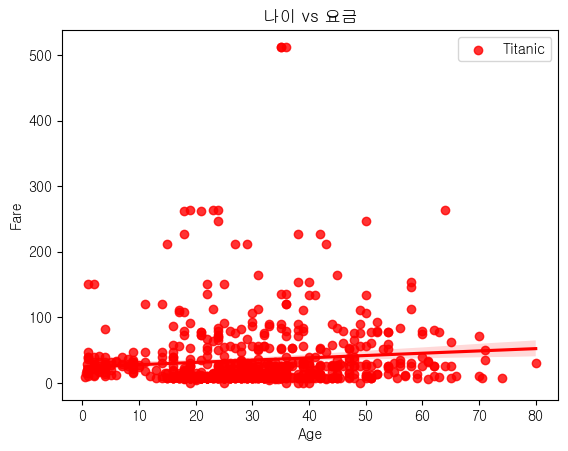

In [21]:
sns.regplot(titanic,
            x = "age",
            y = "fare",
            fit_reg = True,
            color = "r",
            order = 1,
            label = "Titanic")
plt.title("나이 vs 요금")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend()
plt.show()

In [25]:
penguins = sns.load_dataset("penguins")
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


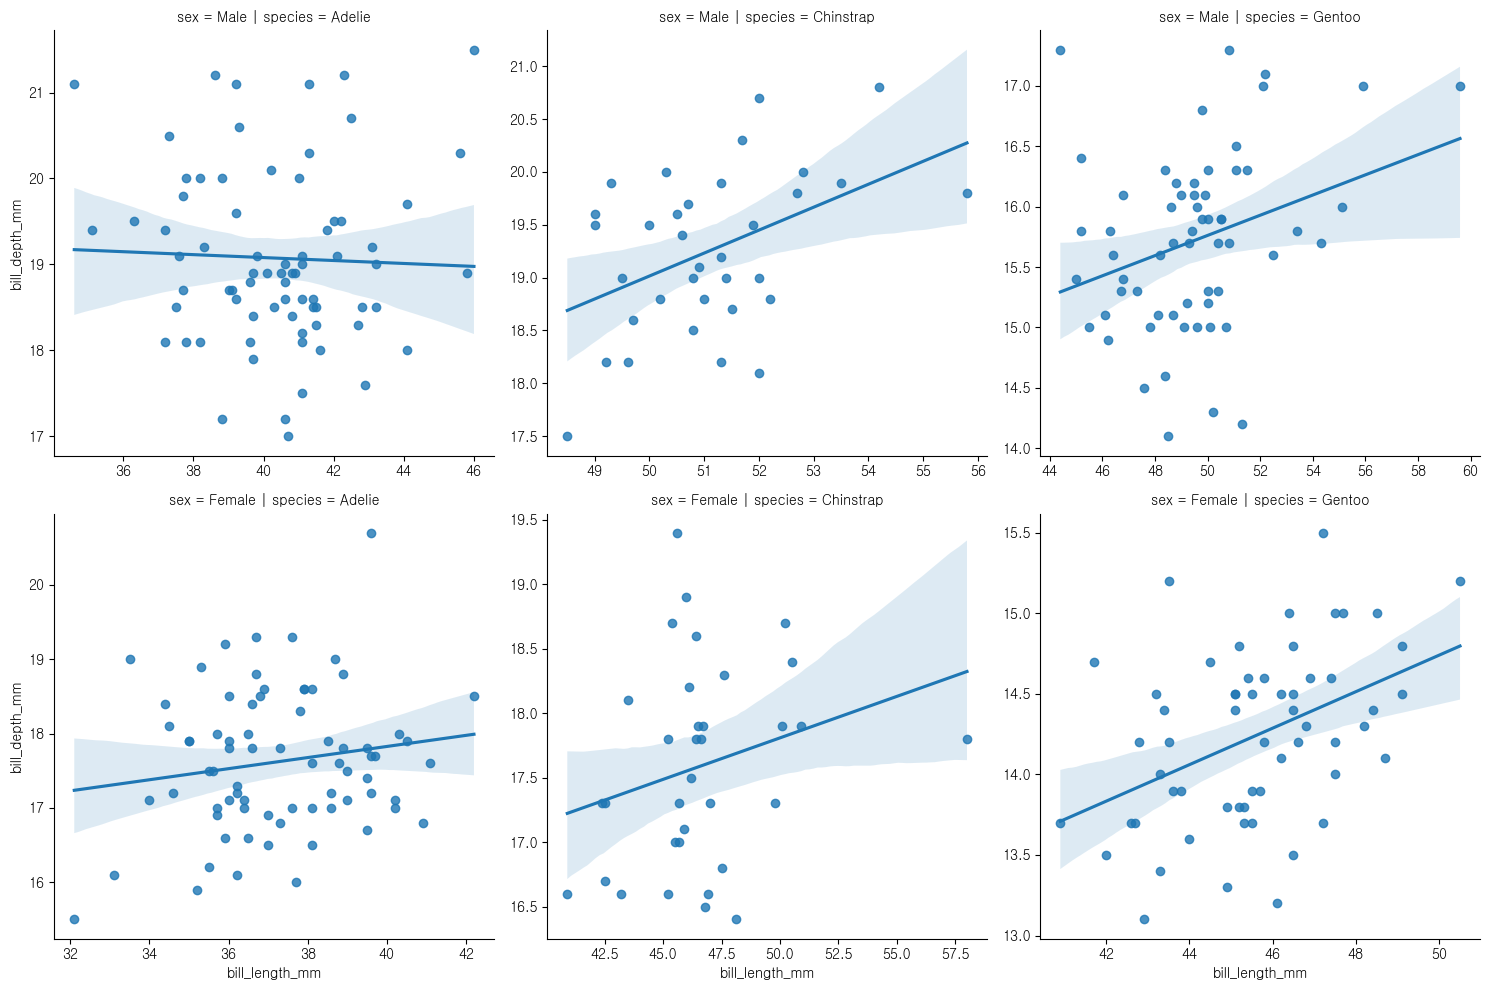

In [29]:
sns.lmplot(penguins, 
           x = "bill_length_mm", 
           y = "bill_depth_mm",
           col = "species", 
           row = "sex",
           sharex = False,
           sharey= False)
plt.show()

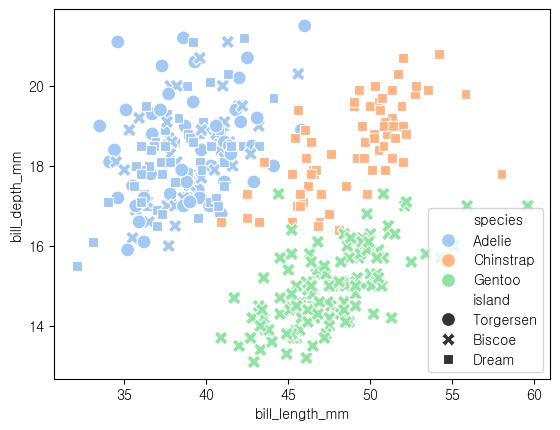

In [32]:
sns.scatterplot(penguins,
            x = "bill_length_mm", 
            y = "bill_depth_mm",
            s = 100,
            hue = "species",
            style= "island",
            palette= "pastel"
                ) 
plt.show()
